<a href="https://colab.research.google.com/github/xogus2171-coder/DEU-Project/blob/main/final_exam_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>
<center><font size='5'><b>AI for Mechanical Engineering</b></font><br><br><font size='5'><b>Recurrent Neural Networks (RNN)</b></font><br><br>

<br><br><br>

# Problem 04

- In this problem, we have bearing data with 3 classes (healthy, inner fault, outer fault).  

- The objective is to classify the given data using state-of-the-art deep learning models.  

- You will build and test a deep learning model.

<br>

__Dataset Description__

The [bearing data](https://data.mendeley.com/datasets/v43hmbwxpm/1) is collected by a sensory system which has 2 channels: <u>vibration</u> and <u>rotational speed</u>. You can refer to the [paper](https://www.sciencedirect.com/science/article/pii/S2352340918314124) to see the specification in detail. The experimental setup is shown in the below figure. The dataset contains 36 files with 3 classes, 2 sensor positions, and 4 speed varying conditions. Every data is sampled at 200,000 Hz of sampling frequency and 10 seconds of duration. We will use only the __increasing speed__ condition and the __channel 1__ (vibration data) for the sake of simplicity.



<br><br>
<center>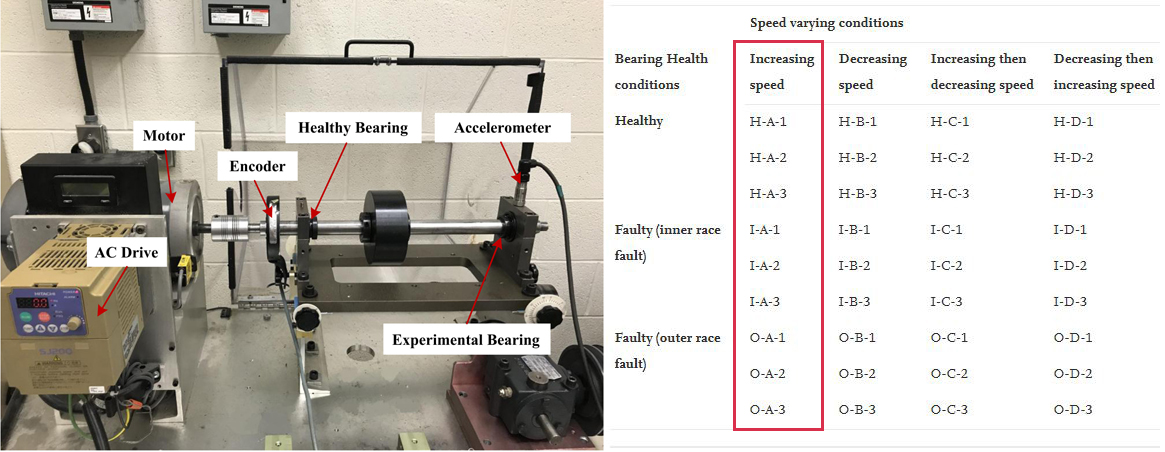</center>


<br>

__Download & Load Data__

We already made the data ready for you. You can download the data in .npy format. Three files are prepared for a train set and three files for a test set.


- [Bearing_Healty_train.npy](https://drive.google.com/file/d/1WiIFy1QoIwY08W04XVYZLhuqIeWnYo2D/view?usp=sharing)
- [Bearing_InnerFault_train.npy](https://drive.google.com/file/d/1Mge0yUMlGivFRZpxh2DNjqIdYKg36-Ss/view?usp=sharing)
- [Bearing_OuterFault_train.npy](https://drive.google.com/file/d/19-8hdkCy8341yiQP5ZW6xLiIRNDceUko/view?usp=sharing)

- [Bearing_Healty_test.npy](https://drive.google.com/file/d/1N3Y4qS7kk_djZYuCOUdXjkepXsC9PFal/view?usp=sharing)
- [Bearing_InnerFault_test.npy](https://drive.google.com/file/d/1H9kktXrOlXnI5kazOb8ggqLjoRQDM48E/view?usp=sharing)
- [Bearing_OuterFault_test.npy](https://drive.google.com/file/d/1-D7gh0xKe26J1UDZcdmPS-oIQBdBbMyg/view?usp=sharing)

<br>

(1) Plot all data with the title of its filename.

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt #라이브러리 불러오기

In [2]:
from google.colab import drive #구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Healthy_train = np.load('/content/drive/MyDrive/DL_Colab/DL_data/Bearing_Healthy_train.npy')
InnerFault_train = np.load('/content/drive/MyDrive/DL_Colab/DL_data/Bearing_InnerFault_train.npy')
OuterFault_train = np.load('/content/drive/MyDrive/DL_Colab/DL_data/Bearing_OuterFault_train.npy')

Healthy_test = np.load('/content/drive/MyDrive/DL_Colab/DL_data/Bearing_Healthy_test.npy')
InnerFault_test = np.load('/content/drive/MyDrive/DL_Colab/DL_data/Bearing_InnerFault_test.npy')
OuterFault_test = np.load('/content/drive/MyDrive/DL_Colab/DL_data/Bearing_OuterFault_test.npy') #데이터 셋 불러오기

In [4]:
## write your code here
def plot_sample_data(data, class_name, num_samples=3):
    num_total = data.shape[0] # 전체 데이터 개수 확인

    for i in range(min(num_samples, num_total)): # 최대 3개까지만 반복
        plt.figure(figsize=(10, 3)) # 그래프 크기 설정
        plt.plot(data[i]) # i번째 시계열 데이터 plot
        plt.title(f'{class_name}_{i}')  #그래프 제목
        plt.xlabel('Time')
        plt.ylabel('Amplitude')  # x축 # y축
        plt.grid(True)
        plt.show() # 그래프 출력

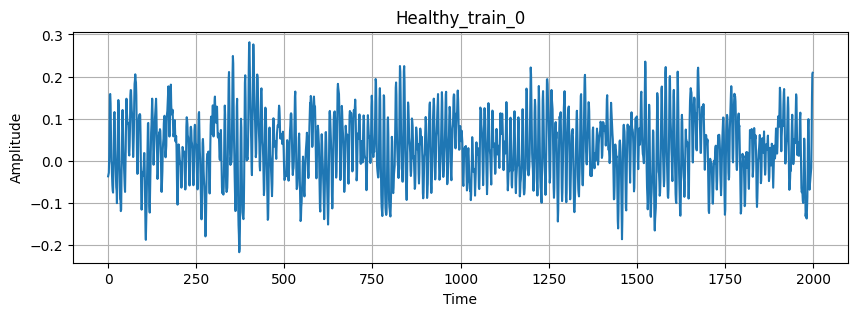

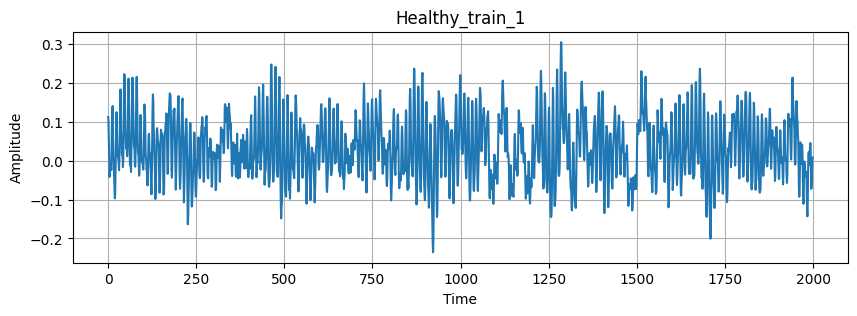

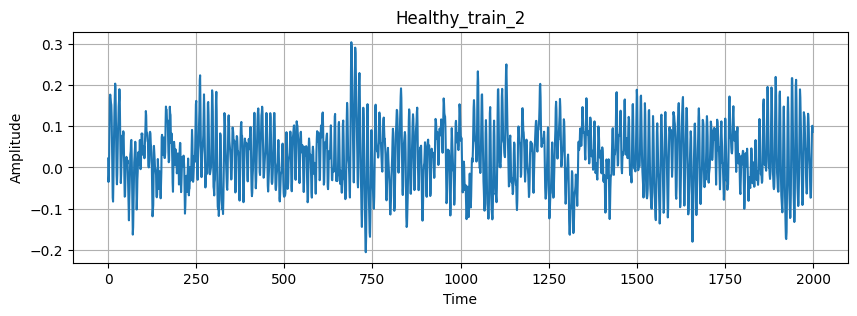

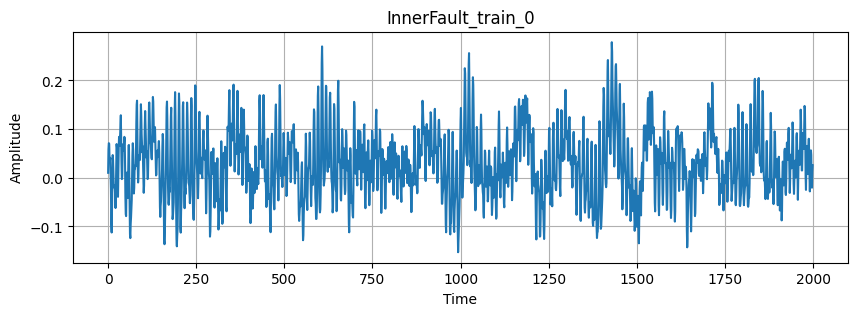

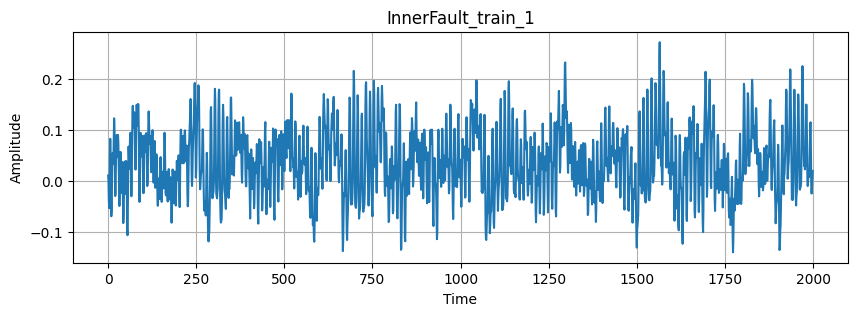

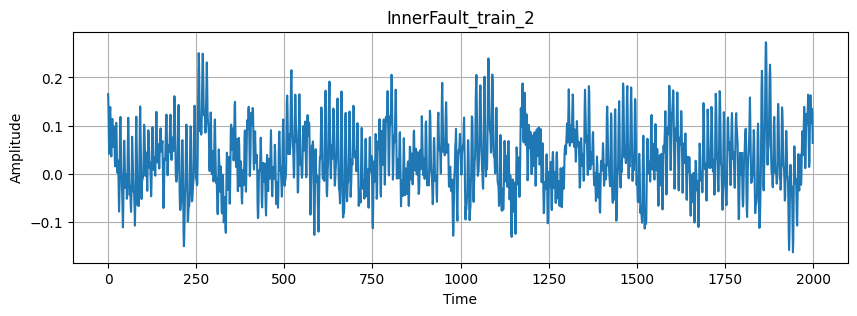

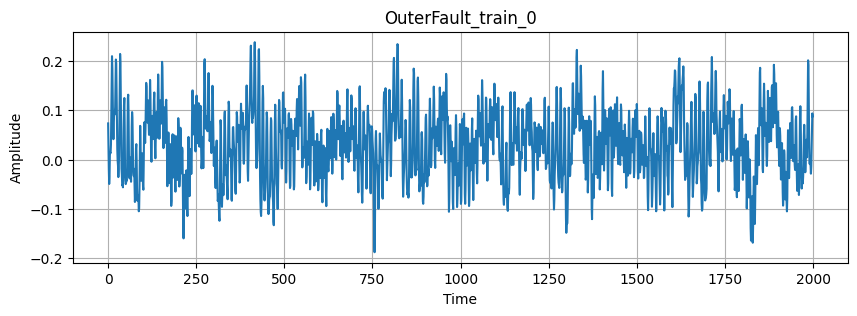

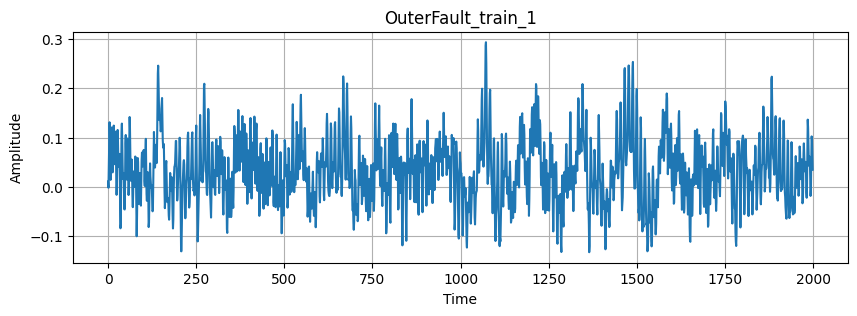

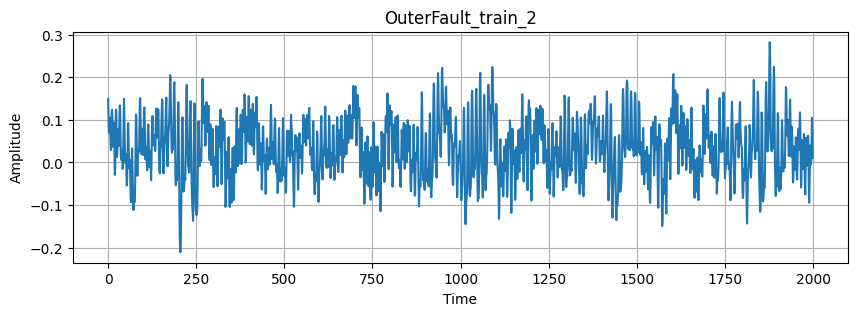

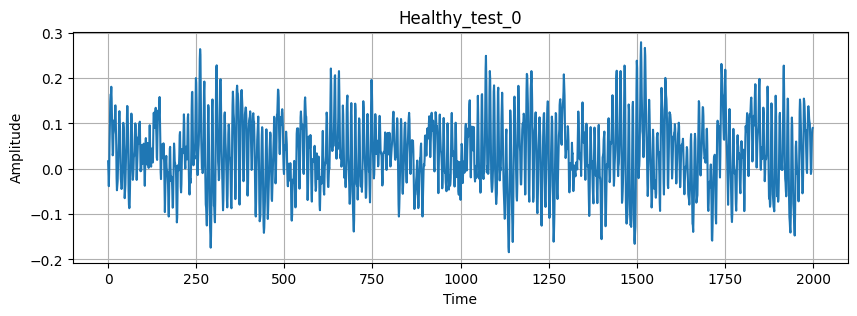

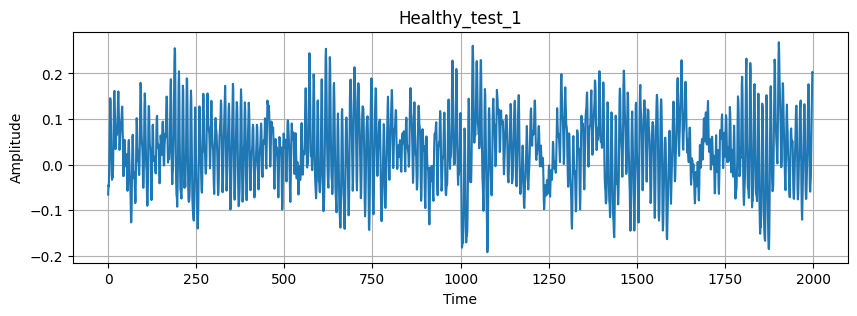

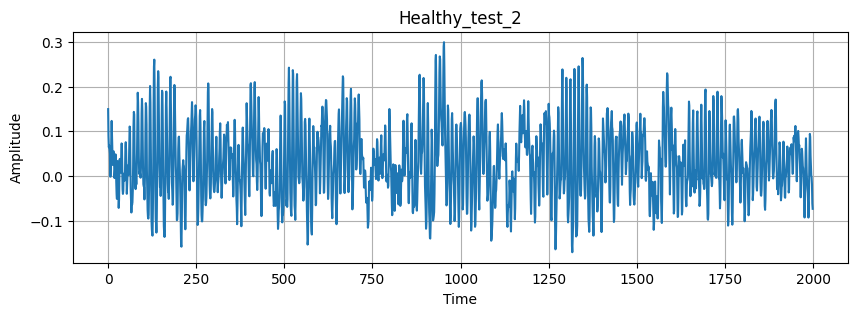

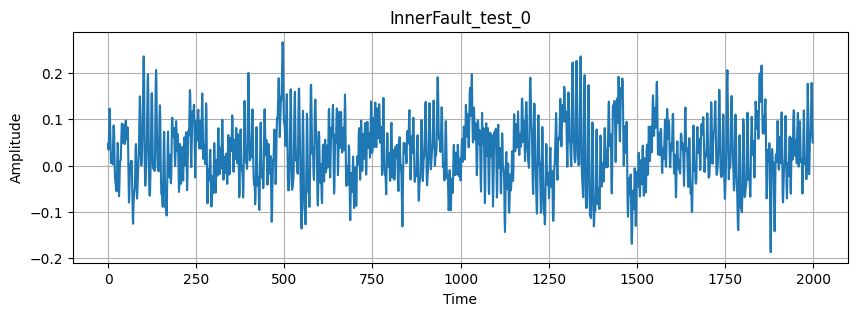

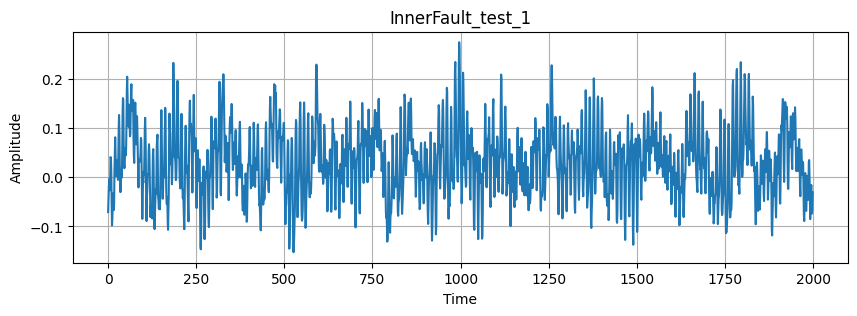

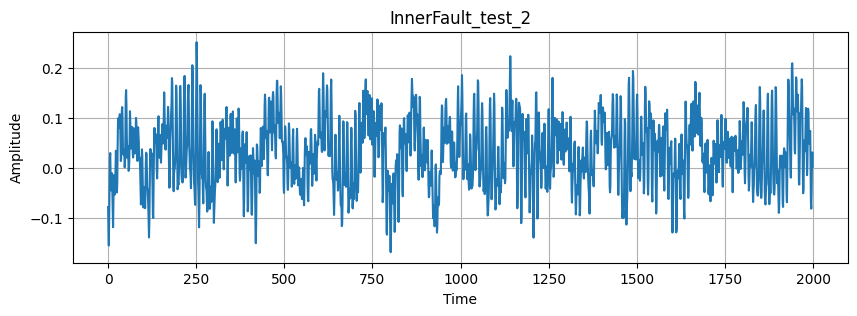

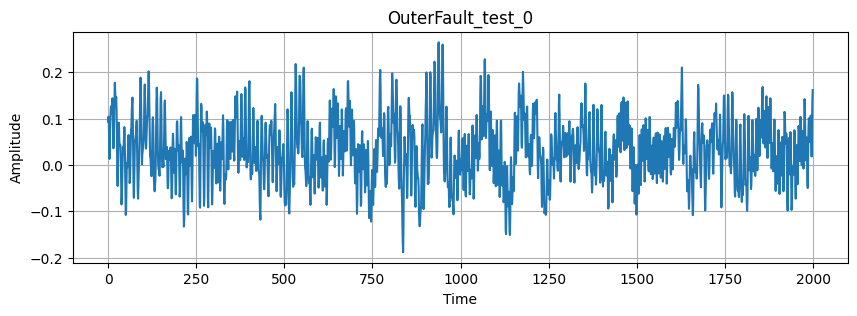

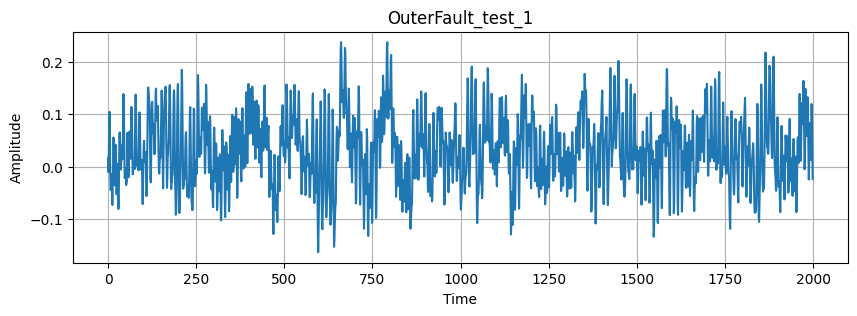

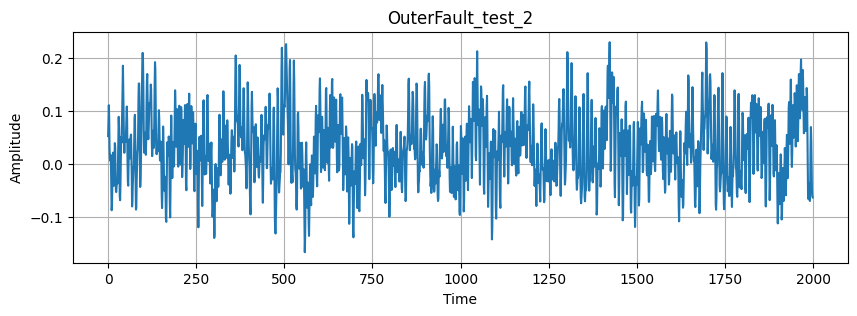

In [5]:
plot_sample_data(Healthy_train, 'Healthy_train') # Healthy 훈련 데이터 세트 3개
plot_sample_data(InnerFault_train, 'InnerFault_train') # Inner Fault 훈련 데이터 세트 3개
plot_sample_data(OuterFault_train, 'OuterFault_train') # Outer Fault 훈련 데이터 세트 3개

plot_sample_data(Healthy_test, 'Healthy_test') # Healthy 테스트 데이터 세트 3개
plot_sample_data(InnerFault_test, 'InnerFault_test') # Inner Fault 테스트 데이터 세트 3개
plot_sample_data(OuterFault_test, 'OuterFault_test') # Outer Fault 테스트 데이터 세트 3개
#문제는 전체 데이터 출력이지만, 너무 방대하므로 3개만 출력함

In the following subproblems, you will be introduced deep learning models which are used for time-series data classification. You are asked to build the model with the given architecture and evaluate the performance.

<br>

__Various deep learning models for time-series data classification__

In the deep learning field, there are plenty of models for time-series data classification. Compared to conventional machine learning algorithms, recent deep neural network models show much higher accuracy as you can see in the table below. In this problem, we will build the __CNN-LSTM model__ which is one of the most successful, and whose elements are covered in this course.

<br>




<center>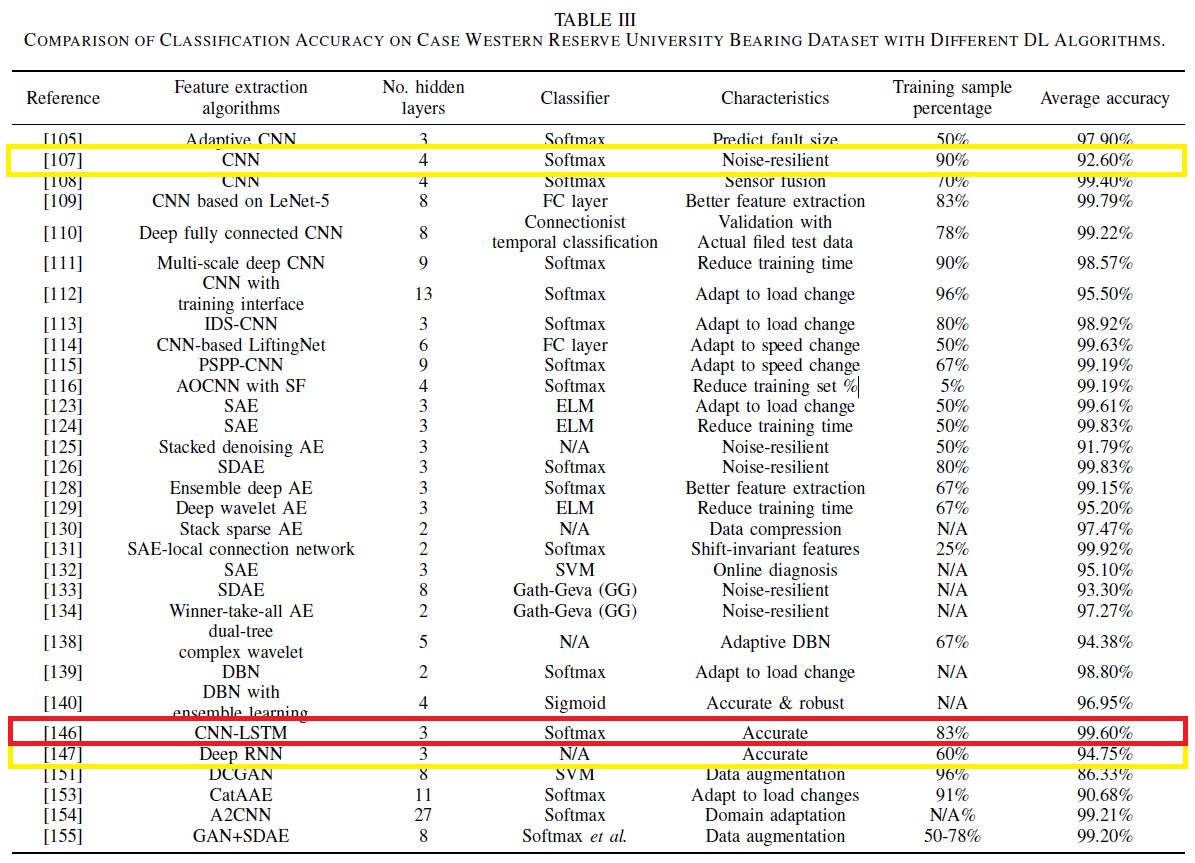</center>
<center><i>"Deep Learning Algorithms for Bearing Fault Diagnostics – A Comprehensive Review", 2020, S Zhang et al.</i></center>



<br>

__Implementation of CNN-LSTM model__


The CNN-LSTM model is introduced in
<a href="https://www.sv-jme.eu/?ns_articles_pdf=/ns_articles/files/ojs/5249/public/5249-29704-1-PB.pdf&id=6130">"An Improved Bearing Fault Diagnosis Method using One-Dimensional CNN and LSTM"</a>. The authors combined 1D CNN and LSTM succesfully and it shows high performance in terms of both computation time and accuracy. The following configuration shows a part of the structure of the model. The model takes the segmented data as an input. A data segment which has a length of 1,600 is randomly cropped from the original time-series data.




<br><br>
<center>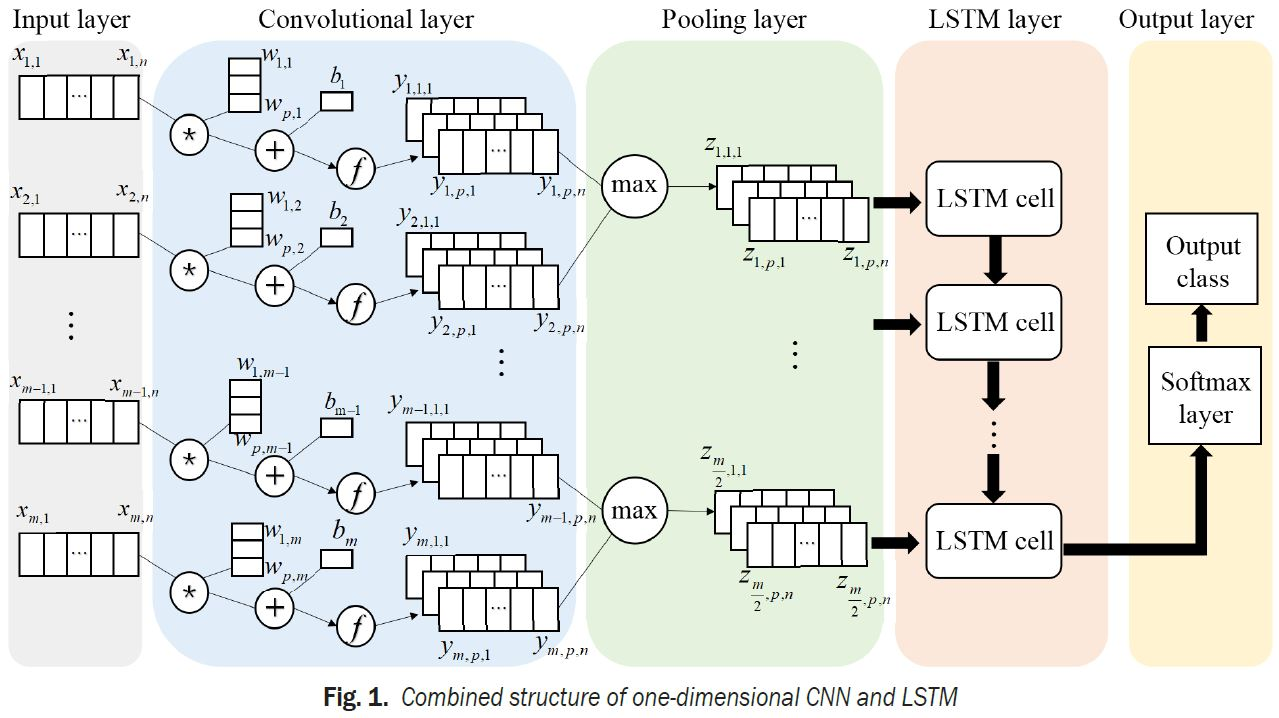</center>

<br><br>


<br>

Build the model based on the above information and print the structure. You can freely assign the other parameters that are not described in the above configuration in order to achieve better performance. (You don't need to refer the original paper for those.) Please refer to the summary of the model structure.

<br>

You will use the 1D convolution layer for this problem. We have learned 2D convolution in class and 1D convolution is nothing but 2D convolution with a height as 1.

<br>

__Input_shape of data = (4000, 2000, 1)__

2000 $\rightarrow$ 20 $\times$ 100 $\rightarrow$ CNN layers $\rightarrow$ LSTM layer

<br>


<br>

(2) Create Training and Test Sets

Prepare a training set and a test set to feed into the model you designed. Set the number of segments to 4,000 for the training set and 1,000 for the test set (for each class).

In [6]:
## write your code here
import numpy as np # 라이브러리 불러오기
from tensorflow.keras.utils import to_categorical

In [7]:
Healthy_train.shape #훈련 데이터 확인, 세그먼트를 4000개로 해야한다
Healthy_test.shape #테스트 데이터 확인

(1000, 2000, 1)

In [8]:
train_segments = 4000  # 클래스당 train 샘플 수
test_segments = 1000   # 클래스당 test 샘플 수

In [9]:
def repeat_samples(data, target_num):
    repeats = target_num // data.shape[0] # 전체 반복 횟수
    remainder = target_num % data.shape[0] # 추가로 필요한 개수

    repeated = np.concatenate([data] * repeats, axis=0) # 전체 반복
    remainder_part = data[:remainder] # 나머지 채우기

    return np.concatenate([repeated, remainder_part], axis=0)

In [10]:
X_train = np.concatenate([
    Healthy_train[:train_segments],
    InnerFault_train[:train_segments],
    OuterFault_train[:train_segments]
], axis=0) #훈련 세트 구성

In [11]:
X_test = np.concatenate([
    Healthy_test[:test_segments],   # Healthy
    InnerFault_test[:test_segments],   # Inner Fault
    OuterFault_test[:test_segments]    # Outer Fault
], axis=0) #테스트 세트 구성

In [12]:
y_train = np.array(
    [0]*train_segments +   # Healthy
    [1]*train_segments +   # Inner Fault
    [2]*train_segments     # Outer Fault
) #훈련 세트 라벨 붙이기
y_test = np.array(
    [0]*test_segments +   # Healthy
    [1]*test_segments +   # Inner Fault
    [2]*test_segments     # Outer Fault
) #테스트 세트 라벨 붙이기


In [13]:
from tensorflow.keras.utils import to_categorical   # one-hot encoding 함수
y_train = to_categorical(y_train, num_classes=3)      # train label
y_test = to_categorical(y_test, num_classes=3)        # test label

In [14]:
print("X_train shape:", X_train.shape) #훈련 세트 확인
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape) #테스트 세트 확인
print("y_test shape:", y_test.shape)


X_train shape: (12000, 2000, 1)
y_train shape: (12000, 3)
X_test shape: (3000, 2000, 1)
y_test shape: (3000, 3)


<br>

(3) Build and Train a CNN-LSTM Model

Construct and train a CNN-LSTM model using the prepared training data.

In [15]:
## write your code here
import tensorflow as tf #라이브러리 불러오기
from tensorflow.keras.models import Sequential # 순차 모델
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, LSTM, Dense, Reshape)  # CNN, LSTM 구성 요소
model = Sequential()  # 순차 모델 선언

In [16]:
model.add(Reshape((20, 100), input_shape=(2000, 1))) # 문제에서 제기한대로 데이터 구성

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.add(Conv1D(filters=32, # 필터 개수
        kernel_size=3, # 커널 크기
        activation='relu')) #렐루 함수

In [18]:
model.add(MaxPooling1D(pool_size=2)) # 시계열 길이 감소

In [19]:
model.add(LSTM(128)) # LSTM(Long Short-Term Memory)

In [20]:
model.add(Dense(3, activation='softmax')) # 클래스 확률 출력

In [21]:
model.summary() # 모델 구조 확인

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 18, 32)         │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,451 (361.14 KB)

 Trainable params: 92,451 (361.14 KB)

 Non-trainable params: 0 (0.00 B)

<br>

(4) Evaluate the Model

Evaluate the model’s performance in terms of accuracy on the test set.

In [22]:
## write your code here
from sklearn.model_selection import train_test_split #훈련 세트와 테스트 세트 나누기

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,y_train,test_size=0.2,random_state=42)

In [23]:
model.compile(optimizer='adam', # 최적화 알고리즘
    loss='categorical_crossentropy', # 다중 클래스 분류 손실
    metrics=['accuracy']) # 성능 지표

In [24]:
history = model.fit(X_tr,y_tr,epochs=5,batch_size=32,validation_data=(X_val, y_val)) #모델 훈련

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6651 - loss: 0.6323 - val_accuracy: 0.8925 - val_loss: 0.2322
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9288 - loss: 0.1595 - val_accuracy: 0.9633 - val_loss: 0.0886
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9830 - loss: 0.0474 - val_accuracy: 0.9904 - val_loss: 0.0236
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9921 - loss: 0.0225 - val_accuracy: 0.9787 - val_loss: 0.0532
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9877 - loss: 0.0311 - val_accuracy: 0.9929 - val_loss: 0.0174


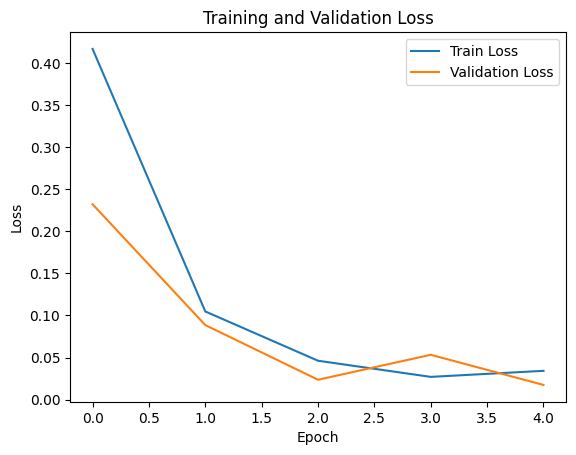

In [25]:
import matplotlib.pyplot as plt # 시각화 라이브러리

#훈련 손실과 검증 손실 그래프
plt.figure() #그래프 생성
plt.plot(history.history['loss']) #훈련 손실
plt.plot(history.history['val_loss']) #검증 손실
plt.xlabel('Epoch') #x축: epoch
plt.ylabel('Loss') #y축: loss
plt.title('Training and Validation Loss') #그래프 제목
plt.legend(['Train Loss', 'Validation Loss']) #범례 표시
plt.show() #그래프 출력